<font size=6>**Deep Learning - Intro**</font>

<div style="border: 1px solid lightgray; padding: 10px; background-color: #f9f9f9;">

<font size=1>

    Summer School for AstroStatistics in Sharjah 2025

The content presented in this notebook is the original work of the authors, unless specified otherwise.
Any publicly available material incorporated is properly credited to its respective sources.
All references to published papers, datasets, and software tools are duly acknowledged.
The original content of this notebook is licensed under the GNU General Public License v3.0 (GNU GPLv3).
</font>
</div>

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

**Artificial Neural Networks** (**NNs**) are a technique used to construct ML tools, using interconnected "neurons" to process the information.

Nowadays, you will often encounter the _synonym_ term "**Deep Learning**" (**DL**), since contemporary NNs are typically **deep**.

Meaning, they use **multiple layers** of neurons to process the input information:

<table><tr>
    <td width=640>
        <img src=images/Simple_vs_Deep.png>
        <center>
            <br>
            Figure 0.  A simple <i>feedforward</i> Neural Network compared with a Deep <i>feedforward</i> Neural Network.<br>
            (From <a href="https://thedatascientist.com/what-deep-learning-is-and-isnt/">here</a>)
        </center>
    </td>
</tr></table>

The actual way the depth is designed can be very different. It could be achieved e.g. by **stacking** sequential layers (_feedforward neural networks_), via **recurrent** layers (_recurrent neural networks_), via **skipped connections** (_e.g., Transformers_), and many other ways.

Don't worry: we will explain how to _computationally_ create neurons/layers [later](#Generic_Architecture_and_Neurons).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set up a fancy plot style (you can comment it out without consequences)
import sys; sys.path.append('../src'); import plot_style

# Why Deep Learning is cool

    It is not, we are geeks, and that's the truth.

However ... we do live in the era of "Big Data":

<table><tr>
    <td width=480>
        <img src=images/Survey_Size_Evolution.png>
        <center>
            <br>
            Figure 1.1.  Current and projected survey size evolution.
        </center>
    </td>
</tr></table>

We cannot expect to humanly inspect these data and derive the intuition for the _rules_ which categorize them.

$\rightarrow$ We have to leverage on:

- the **large number** of examples

- algorithms that can abstract **arbitrarily complex** rules

## How does Deep Learning addresses big data issues?

The basic idea is that layers construct **new features**.

In practice, Deep Learning systems include implicit **feature engeneering** _on top_ of the learning task (e.g., _classificaton_ or _regression_).<br>

In this way, they are a step forward with respect to "classic" ML approaches:

<table><tr>
    <td width=480>
        <img src=images/Deep_Feature_Engeneering.png>
        <center>
            <br>
            Figure 1.2.  A Deep Neural Network seen as a combination of feature extractor + learner (e.g. classifier or regressor).<br>
            (From <a href="https://stats.stackexchange.com/questions/562466/neural-networks-automatically-do-feature-engineering-how/">here</a>)
        </center>
    </td>
</tr></table>

From this perspective, the connections between the network neurons represent **potential correlations** betweeen features.

<font size=3><u>**What are the implications?**</u></font>

The scientist **does _not_ have to get detailed insight of the problem** to build the proper features or select the proper classifier<br>
&emsp; $\rightarrow$ the DL system does it all for us!

This comes particularly handy when we deal with databases with **millions of objects** and **hundreds of features**!

<font size=3><u>**References**</u></font>

In case you are curious, it has been proven that Deep Neural Networks are indeed "**_universal approximators_**"
(e.g. [Kurt Hornik, 1991, Neural Networks, 4, 2](https://www.sciencedirect.com/science/article/abs/pii/089360809190009T?via%3Dihub)), meaning that they can in principle explain any linear or non-linear relation beteen the features and the target.

## Historical excursus

The history of NNs is troubled.  Arguably, NNs have been originally inspired by _biological_ neurons.

**1943** $\rightarrow$ **Warren McCulloch** (neurophysiologist) and **Walter Pitts** (mathematician)<br>
&emsp; _Simplified computational model of how biological neurons might work together in animal brains_

<table><tr>
    <td width=800>
        <img src="images/Cortex.png" width="800">
        <center>
            <br>
            Figure 1.2.B.  Neuron layers in the human cortex.
            <br>
            (Adapted from Figure 10-2 of <a href="https://github.com/ageron/handson-ml2">Gerone A. 2017</a>)
        </center>
    </td>
</tr></table>

**mid'40s$-$'60s** $\hspace{0.6cm}$ $\rightarrow$ Follows some interest and development of early models (e.g. **Perceptron**) 

**'70s$-$mid'80s**  $\hspace{0.6cm}$ $\rightarrow$ NNs cannot scale efficiently, they get **disregarded**

**mid'80s$-$mid'90s** $\rightarrow$ The invention of **backpropagation** allows to train complex NNs, but ...

**mid'90s-2010s** $\hspace{0.5cm}$ $\rightarrow$ Other techniques look simpler, more powerful (e.g. **SVM**)

**2010s$-$present** $\hspace{0.3cm}$ $\rightarrow$ Second reinassance of NNS,  mostly due to:

> - huge quantity of data availability
> - powerful GPU cards (_bad Bitcoin, bad!  Gaming: good boi!_)
> - improvement of training algorithms
> - virtuous circle of funding and progress

<table><tr>
    <td width=800>
       <img src=images/History_NNS.jpeg width="800">
        <center>
            <br>
            Figure 1.2.C.  The tormented history of NNs.
            <br>
            (From <a href="https://twitter.com/ricard_sole/status/1497306702181548039">here</a>)
        </center>
    </td>
</tr></table>


Today the association to biological NNs is obsolete, and possibly even detrimental (see _sigmoid_ activation function).

## Deep Learning in Astronomy


Astronomy got a **late start** to the DL race ( _prejudice against the "black box"_ vs. _old school statistics?_ ).<br>
However ... 

Astronomy is the perfect DL lab because it offers:
- tough problems to solve
- large data

In fact, Deep Learning publications are **exploding** in Astronomy!

<table><tr>
    <td width=400>
        <img src=images/Deep_Learning_astro_papers.png alt="Deep_Learning_astro_papers.png">
        <center>
            <br>
            Figure 1.4.A. Number of refereed astronomy papers containing the text "Deep Learning" in their abstracts.<br>
            (From <a href="https://ui.adsabs.harvard.edu/">NASA ADS</a>)
        </center>
    </td>
</tr></table>

<font size=3><u>**Some notable examples**</u><font>

**Galaxy Classification**
    
- [Dieleman et al. (2015), MNRAS, 450, 1441](https://ui.adsabs.harvard.edu/abs/2015MNRAS.450.1441D/abstract) $-$ calculate probabilities for the 37 Galaxy Zoo possible answers

    - **training**: classification of 61,578 JPEG images from SDSS with GZ labels
    - **architecture**: standard CNN


<table><tr>
    <td width=1000>
        <img src=images/P_Dieleman_Fig11_Galaxy_Zoo_flowchart.png alt="Dieleman">
        <center>
            <br>
            Figure 1.4.B. <i>Left</i> $-$ Galaxy Zoo classification tree (From <a href="https://ui.adsabs.harvard.edu/abs/2013yCat..74352835W/abstract">Willet et al. 2013</a>).
            <i>Right</i> $-$ Activation of the CNN layers (From <a href="https://ui.adsabs.harvard.edu/abs/2015MNRAS.450.1441D/abstract">Dieleman et al. 2015</a>).
        </center>
    </td>
</tr></table>

- [Ackerman et al. 2017, MNRAS, 479, 415](https://ui.adsabs.harvard.edu/abs/2018MNRAS.479..415A/abstract) $-$ identify mergers

    - **training**: classification of ~4000 JPEG images from SDSS with GZ labels
    - **architecture**: CNN with transfer learning
    
<table><tr>
    <td width=480>
        <img src=images/P_Ackerman_Fig8.png alt="Ackerman">
        <center>
            <br>
            Figure 1.4.C. Some galaxy pairs confidently identified as mergers.<br>
            (From <a href="https://ui.adsabs.harvard.edu/abs/2018MNRAS.479..415A/abstract">Ackerman et al. 2017</a>)
        </center>
    </td>
</tr></table>

**Galaxy Morphology**
    
- [Aragon-Calvo et al. 2020, MNRAS, 498, 3713](https://ui.adsabs.harvard.edu/abs/2020MNRAS.498.3713A/abstract) $-$ obtain structural parameters via self-supervised learning

    - **training**: re-produce parameters used to generate artificial galaxies
    - **architecture**: semantic autoencoder
    
<table><tr>
    <td width=640>
        <img src=images/P_Aragon_Semantic_Autoencoder.png alt="Aragon">
        <center>
            <br>
            Figure 1.4.D. Fitting of morpological structural parameters with an Autoencoder.<br>
            (From <a href="https://ui.adsabs.harvard.edu/abs/2020MNRAS.498.3713A/abstract">Aragon-Calvo et al. 2020)</a>
        </center>
    </td>
</tr></table>

**Serendipitous Detection**  
    
- [Lanusse et al. 2018, MNRAS, 473, 3895](https://ui.adsabs.harvard.edu/abs/2018MNRAS.473.3895L/abstract) $-$ spot gravitational lenses

    - **training**: 20,000 LSST-like observations
    - **architecture**: CNN + ResNet
    
<table><tr>
    <td width=480>
        <img src=images/P_DeepLens_Fig8.png alt="DeepLens">
        <center>
            <br>
            Figure 1.4.E. Some images correctly identified as hosting lenses.<br>
            (From <a href="https://ui.adsabs.harvard.edu/abs/2018MNRAS.473.3895L/abstract">Lanusse et al. 2018</a>)
        </center>
    </td>
</tr></table> 

- [Dekany & Grebel al. 2020, ApJ, 898, 46](https://ui.adsabs.harvard.edu/abs/2020ApJ...898...46D/abstract) $-$ spot fundamental-mode RR Lyrae stars 

    - **training**: 10$^7$$-$10$^8$ near-IR photometric time-series
    - **architecture**: RNN
    
<table><tr>
    <td width=480>
        <img src=images/P_Dekani_Fig4.png alt="Dekani">
        <center>
            <br>
            Figure 1.4.F. Spatial distribution of the objects used as training set.<br>
            (From <a href="https://ui.adsabs.harvard.edu/abs/2020ApJ...898...46D/abstract">Dekany & Grebel al. 2020</a>)
        </center>
    </td>
</tr></table>

**Image Reconstruction**
       
- [Schawinski et al. 2017, MNRAS, 467, 110](https://ui.adsabs.harvard.edu/abs/2017MNRAS.467L.110S/abstract) $-$ image denoising

    - **training**: 4550 nearby SDSS galaxies
    - **architecture**: GAN
    
<table><tr>
    <td width=800>
        <img src=images/P_Schawinski_Fig2.png alt="Schawinski">
        <center>
            <br>
            Figure 1.4.G. Degraded image details reconstructed by a GAN.<br>
            (From <a href="https://ui.adsabs.harvard.edu/abs/2017MNRAS.467L.110S/abstract">Schawinski et al. 2017</a>)
        </center>
    </td>
</tr></table>

**Cosmological Simulations**
    
- [Rodríguez et al. 2018, ComAC, 5, 4](https://ui.adsabs.harvard.edu/abs/2018ComAC...5....4R/abstract) $-$ create computationally _cheap_ cosmological simulations

    - **training**: 10 independent L-PICOLA simulation boxes
    - **architecture**: GAN
    
<table><tr>
    <td width=800>
        <img src=images/P_Rodriguez_Fig1.png alt="Rodriguez">
        <center>
            <br>
            Figure 1.4.H. Comparison between the results of a N-body simulation (<i>left</i>) and from a GAN (<i>right</i>).<br>
            (Adapted from <a herf="https://ui.adsabs.harvard.edu/abs/2018ComAC...5....4R/abstract">Rodríguez et al. 2018</a>)
        </center>
    </td>
</tr></table>

**Source Density Predicition**

- [Xu et al. 2023, ApJ, 950, 2](https://ui.adsabs.harvard.edu/abs/2023arXiv230401670X/abstract) $-$ get a census of Giant Molecular Clouds (GMCs) from their $N_H$ column-density images
    
    - **training**: 7179 high-res MHD simulations of clouds
    - **architecture**: Diffusion Models
    
<table><tr>
    <td width=600>
        <img src=images/P_Xu_Fig2.png alt="Xu">
        <center>
            <br>
            Figure 1.4.I. The true GMC number density (<i>bottom-left</i>) is iteratively reconstructed, conditioned on the line-of-sight $N_H$ column density (<i>top-left</i>) .<br>
            (From <a href="https://ui.adsabs.harvard.edu/abs/2023arXiv230401670X/abstract">Xu et al. 2023, ApJ, 950, 2</a>)
        </center>
    </td>
</tr></table>

**Inference of Cosmological Parameters**

- [Jeffrey et al. 2025, MNRAS, 536, 2](https://ui.adsabs.harvard.edu/abs/2025MNRAS.536.1303J/abstract) $-$ constrain 
$𝑤$CDM cosmological parameters using SBI on Dark Energy Survey weak-lensing maps
    
    - **training**: 791 full-sky $N$-body simulations
    - **architecture**: Simulation Based Inference + NN compression
    
<table><tr>
    <td width=480>
        <img src=images/P_Jeffrey_Fig14.png alt="Jeffrey">
        <center>
            <br>
            Figure 1.4.L. Corner plot of the posteriors for <i>&Omega;<sub>m</sub></i>, <i>S<sub>8</sub></i>, and <i>w</i>.<br>
            (From <a href="https://ui.adsabs.harvard.edu/abs/2025MNRAS.536.1303J/abstract">Jeffrey et al. 2025</a>)
        </center>
    </td>
</tr></table>

# Neural Networks (NN) Components

## Generic Architecture and Neurons
<a id='Generic_Architecture_and_Neurons'></a>

<table><tr>
    <td width=640>
        <img src=images/Generic_Architecture.png>
        <center>
            <br>
            Figure 2.1.  A simple, generic <i>feedforward</i> deep neural architecture.  Neurons of a layer might be connected to al the neurons of the neighboring layers, like in this example (<i>fully-connected</i> layers), or not.<br>
            (Adapted from <a href="https://ui.adsabs.harvard.edu">here</a>)
        </center>
    </td>
</tr></table>

<font size=3><u>**Nomenclature**</u><font>
    
**Neuron**: A simple element in a network, carrying 1 value.
    
**Layers**: A collection of neurons activated simultaneously.<br>
    
    Layers are represented differently depending on the architecture.
    E.g., fully-connected layers (as in the Figure above), appear as vertical stripes of neurons.
  
- **input layer**: the data
- **hidden layers**: the internal layers ("_hidden_" from the point of view of the NN user)
- **output layer**: the variable(s) of interest (e.g., class(es) or $y$)
    
    
    E.g., if we provide an image as input, each pixel is 1 neuron of the input layer.


Contemporary NNs contain hundreds to thousands of layers, with millions to billions of neurons.

## Weights and Biases

The core of the functioning of any NN is how the **information flows** through a neuron.

<table><tr>
    <td width=800>
        <img src=images/neuron_flow.gif alt="neuron_flow.gif">
        <center>
            <br>
            Figure 2.2.  How the information is propagated through a neuron.<br>
            (Image by P. Bonfini, Astrostatistics in Crete, made with <a href="https://github.com/ManimCommunity/manim">Manim</a>, free reproduction)
        </center>
    </td>
</tr></table>


1. **The first stage is <u>linear</u>:**<br>
    A neuron takes all the inputs (values) x$_i$ directed into it, multiplies each of them by a different _weight_ ($w_i$), and takes the sum.<br>
    Then, it adds a _bias_ ($b$).
<br>

2. **The second stage is (usually) <u>non-linear</u>:**<br>
    The summation is passed to an **activation function**.<br>
    The activation function acts as a filter, basically deciding when and how the information shall flow. 

The ouput of a single **neuron** is therefore:

   $$ \hat{y} = f\left( \sum \mathbf{w} \cdot \mathbf{x} + b \right) $$

<br>

<u>**IMPORTANT**</u>

The _weights_ and _biases_ are <u>the</u> elements that are fit during the training of the model! 

Fitting a model == optimizing **all** the _weights_ and _biases_ within the NN, in order to **approximate** the desired output $y$ given a corresponding example $x$.

## Activation Functions

Activation functions are what make NNs so **efficient** as universal tools.

They introduce <u>non-linearities</u> $\rightarrow$ a NN can create an arbitrarily complex model.

They can be basically **any** _filter_-like function, but they better posses [some of] these features:

- **computationally inexpensive** $\leftarrow$ hence simple, since they get executed at each neuron

- **zero-centered** $\leftarrow$ not to shift values towards a preferential direction

- **differentiable** $\leftarrow$ because NNs work with [Backpropagation](#Error-Function,-Gradient-Descent-and-Backpropagation)

- **avoid vanishing when chained** $\leftarrow$ more correctly, we need to avoid vanishing gradients<br>
  &emsp; (see [Gradient Descent and Loss](#Error-Function,-Gradient-Descent-and-Backpropagation), and [Glorot & Benjo 2010](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf))


<table><tr>
    <td width=480>
        <img src=images/Activation_Functions.png>
        <center>
            <br>
            Figure 2.3.  A collection of commonly used activation functions<br>
            (Adapted from <a href="https://wandb.ai/lavanyashukla/vega-plots/reports/Natural-Language-Processing--Vmlldzo2Nzk2Ng">here</a>)
        </center>
    </td>
</tr></table>

## NN Architecture Variants

NN come in **countless architectures**, and even trying to classify them is a tough task ...

<table><tr>
    <td width=640>
        <img src=images/NN_Zoo.png>
        <center>
            <br>
            Figure 2.4.  A reasonably complete scheme of basic NN architectures.<br>
            (Image credit: <a href="https://www.asimovinstitute.org/author/fjodorvanveen/">Fjodor van Venn</a>) 
        </center>
    </td>
</tr></table>

# Training NNs

As mentioned above:

    training a NN = optimize its weights and biases
    
in order to produce the desired output (class or values) given a corresponding input.

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

The details of the training method depends on the DL learning problem:

- **supervised:** we have labelled examples 
- **unsupervised:** no labeles are available 
- **reinforced:** the examples are associated to a "reward" 

In this notebook, we will focus on the **supervised** case to illustrate the NN mechanics:<br>
$\rightarrow$ Let's assume we have some predicting variables $X$, and labels $y$.

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

How can we _tell_ the network in which way it shall modify weights (and biases)?<br>
Let's break down the NN rationale:

> 1. We initialize the weights to some arbitrary value
> 2. We take a sub-sample (**batch**) of the data $X$, $X_{batch}$ 
> 3. We propagate $X_{batch}$ through the network, obtaining a predicted $\hat{y}_{batch}$
> 4. We assess the **error** between $\hat{y}_{batch}$ and the true $y_{batch}$
> 5. We need to **backpropagate** back the information about the difference
> 6. We need to **update** the weights in the right direction
> 7. Repeat from step 2 untill all data are used
> 8. (Repeat from 2 for multiple **epochs**)

The critical steps are #4, #5 and #6. 

## Error Function, Gradient Descent and Backpropagation

Let's consider an **errorr** (a.k.a. **loss**, or **cost**) function:

$$ E (\hat{y}, y) $$

which assesses the intensity of the error.  For _example_, we might adopt: $E (\hat{y}, y) = {1\over2}(\hat{y} - y)^2 $.

To be precise, $\hat{y}$ is itself a function of the input $\boldsymbol{x}$, and of the NN parameters $\theta$ (all the $w$ and $b$ of each node):

$$ \hat{y} = f(\boldsymbol{x}, \theta) $$

therefore:

$$ E = E (\boldsymbol{x}, y, \theta) $$

**Our objective:** Minimize the error by finding the optimal set $\hat{\theta}$, i.e.:
$$ \hat{\theta} = \min_{\theta} E(\boldsymbol{x}, y, \theta) $$

<font size=3><u>**A useful consideration**</u><font>

The **gradient** of $E$ with respect to $\theta$, i.e. $\nabla_{\theta} E (\boldsymbol{x}, y, \theta)$, is a vector _roughly_ pointing towards the minimum of $E$:

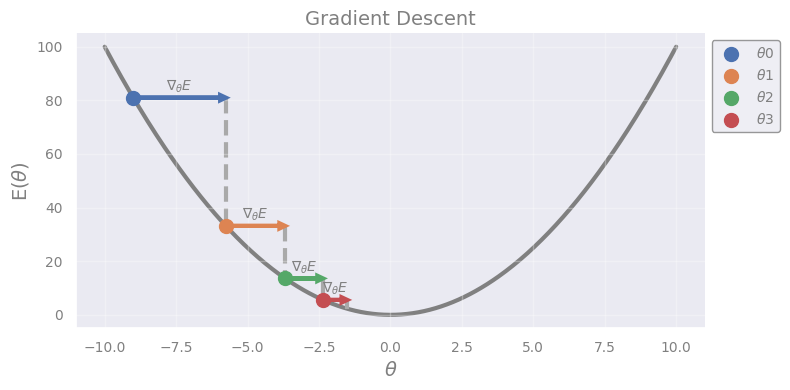

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def E(theta): return theta**2
def dE_dtheta(theta): return 2*theta

thetas = np.linspace(-10, 10, 400)
theta = -9
'''First guess for the parameter''';
eta = 0.18
'''Learning rate: try to change this to small/large values (e.g., 0.08, or 1)''';

plt.figure(figsize=(8, 4))
plt.title('Gradient Descent')

plt.plot(thetas, E(thetas), c='grey', lw=3, zorder=-1)

for i, color in enumerate(['C0', 'C1', 'C2', 'C3']):
    plt.scatter(theta, E(theta), s=100, c=color, label=r'$\theta$'+str(i))
    #
    theta_prime = theta - eta*dE_dtheta(theta)
    plt.arrow(theta, E(theta), theta_prime - theta, 0, lw=3, head_width=2, head_length=0.2, fc=color, ec=color, length_includes_head=True)
    plt.plot([theta_prime, theta_prime], [E(theta), E(theta_prime)], '--', lw=3, c='darkgrey', zorder=-1)
    plt.text((theta + theta_prime) / 2, E(theta) + 1, r'$\nabla_{\theta} E$', ha='center', va='bottom')
    #
    theta = theta_prime

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'E($\theta$)', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

We can therefore **update** the weights by adding a vector proportional to $\nabla_{\theta} E$:

$$ \theta^\prime = \theta - \eta \cdot \nabla_{\theta} E ~~~~~(1)$$

where the proportionality constant $\eta$ is called **learning rate** (**LR**) because it regulates how fast we shall proceed towards the mininum<br>
(and possibly _overshoot_ it, if $\eta$ is too large).

> _This is the **Gradient Descent** optimization._

<div class="alert alert-warning" role="alert" style="border-radius: 8px; padding: 10px">

**In-class Exercise [5 min]**: In the above code block, try to change the value of `eta` to see what happens when the update is _too fast_ or _too slow_

</div>

<font size=3><u>**Calculating the gradient**</u><font>

We have $\nabla_{\theta} E~$:

$$ \nabla_{\theta} E =
      \left( \frac{\partial E}{\partial \theta_1},
             \frac{\partial E}{\partial \theta_2},
             . . .,
             \frac{\partial E}{\partial \theta_n}
\right)$$

where the $\theta_i$ are **all** the _weigths_ and _biases_ along the network.

> _.. BUT ... how do I <u>exactly</u> calculate <u>each</u> $\frac{\partial E}{\partial \theta_i}$ ?_

For example, consider the simple network:
- 2 input neurons
- 2 hidden layers, each with 2 neurons
- 2 output neurons

<table><tr>
    <td width=640>
        <img src=images/Backprop_NN.png>
        <center>
            <br>
            Figure 3.1.A.  All the parameters of a 2-hidden-layer NN.<br>
            (From this amazing graphical explanation by <a href="https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0">Brent Scarff</a>) 
        </center>
    </td>
</tr></table>


where, in this **notation**:

> $ z = \sum{\textbf{w}\cdot{}\textbf{x} + b} $<br>
> _is just the neuron value **before** the activation function_
>
> $ a = f(z) $<br>
> _is just the neuron value **after** the activation function_


How do I calculate, e.g.:
$$ \frac{\partial E}{\partial w^{(2)}_{11}} ~~~~~ ?$$


$\rightarrow$ <u>Chain rule of derivatives</u> !

<table><tr>
    <td width=640>
        <img src=images/Backprop_NN.gif>
        <center>
            <br>
            Figure 3.1.B.  Calculating the gradient at a specific position in the NN.<br>
            (Image credit: <a href="https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0">Brent Scarff</a>) 
        </center>
    </td>
</tr></table>

We can just apply the same trick over and over, to get any component of $\nabla E_\theta$:

<table><tr>
    <td width=640>
        <img src=images/Backpropagation_NN_1st_layer.gif>
        <center>
            <br>
            Figure 3.1.C.  Calculating the gradient at a deeper position in the NN.<br>
            (Image credit: <a href="https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0">Brent Scarff</a>) 
        </center>
    </td>
</tr></table>

You can imagine **propagating** the chain rule back to the original input: all the steps are either _linear_ or passing through a _differentiable_ activation function!

With that, we now how to update any $w$ and $b$:

> _This is the **Backpropagation** technique._

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

[-] Strongly suggested read: [This blog by Brent Scarff](https://towardsdatascience.com/understanding-backpropagation-abcc509ca9d0).

## Optimization Algorithms

Let's recall _Equation 1_:

$$ \theta^\prime = \theta - \eta \cdot \nabla_\theta E ~~~~~(1)$$

Ok $-$ we have the Gradient method $-$ **BUT**:

1. A NN model can easily contain millions of parameters $\rightarrow$ Can we efficiently **explore** the parameter space, to find the global minimum?
2. How do we **pick** the correct learning rate $\eta$ ?

$\rightarrow$ **Optimization Algorithms** address these issues.

### Momentum optimization

This method takes in account the **previous values** of the gradient.

It is particularly useful when exploring _monotonic_ parameter spaces, because it can skip faster through large areas of the landscape.
    
The parameter update is a variation to Equation 1:
    
$$
\begin{align}
\textbf{m} &\leftarrow \beta \textbf{m}  - \eta \cdot \nabla_\theta E ~~~~~ (2) \\
\theta     &\leftarrow \theta + \textbf{m}
\end{align}
$$


- $\beta$ represents the current "velocity" of the gradient.<br>
- The larger $\beta\in$ [0, 1], the more previous steps are taken into account.


We can interpret Equation 2 as:

> _"Globally descending following the direction m, and updating m based on local gradient."_

<table><tr>
    <td width=1000>
        <img src=images/Momentum.gif>
        <center>
            <br>
            Figure 3.2.  Representation of the influence of Momentum on the GD.<br>
            The descent is much faster than the standard Gradient Descent (i.e. $\beta = 0$)<br>
            However, for very large values of $\beta$, the search can 'oscillate' around the optimum point.<br>
            (From <a href="https://mlfromscratch.com/optimizers-explained/#/">here</a>)  
        </center>
    </td>
</tr></table>

### Adaptive learning rates

They address the issue that the descent is **different for each parameter** (_i.e., for each 'direction' in the parameter space_):

Their differ on how they **dynamically adjust** the learning rate (LR).

<font size=3><u>**AdaGrad**</u><font>

AdaGrad **separately** scales the LR for each parameter $\rightarrow$ Each direction gets a "personalized" search.

> LR scaling $\leftarrow$ inversely to the **sum of the squares** of _all_ the historical gradients.

<table><tr>
    <td width=600>
        <img src=images/AdaGrad.png>
        <center>
            <br>
            Figure 3.3.  AdaGrad optimization compared to that of Gradient Descent.<br> 
            (Adapted from <a href="https://github.com/ageron/handson-ml2">Figure 11-7, A. Gerone 2022</a>) 
        </center>
    </td>
</tr></table>

**PROs:**
- Directions with larger gradient see their LR decrease faster.
    
**MAJOR CON:**

- May stop too early $\rightarrow$ _better not use it!_

<font size=3><u>**RMSProp**</u><font>

Puts a patch to AdaGrad early stopping.

> LR scaling $\leftarrow$ inversely to the **exponentially weighted moving average** of previous gradients.


<font size=3><u>**Adam**</u><font>

Adam (_i.e., Adaptive Moments_) is sort of **RMSProp + Momentum Optimization**.

> LR scaling $\leftarrow$ uses both the **first** and the **second** moment of past gradients.

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

_NOTE: Don't confuse "moment" of a quantity with "momentum":_
    
$$ moment\_n = E~[X^n]$$

- _moment_1 = **average**_
- _moment_2 = **uncentered variance** (variance without centering around the mean)_
   
_In other words, RMSProp  uses the first moment $-$ with $E[]$ being an exponentially-weighted average._
    
_**Adam also** makes use of the second moments of the historical gradients._

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">
    
**TL;DR:** Adam is arguably the **best-performing** optimizer on average:
- quite **robust** with respect to the choice of hyperpars
- usually works with **default** hypepars

$\rightarrow$ Safe choice!
    
    
<font size=3><u>**Reading material**</u><font>
    
At this [page](https://ml-cheatsheet.readthedocs.io/en/latest/optimizers.html) you will find graphical explanations of these [and more] optimizers as well as their mathematical formulations.

## Learning Curves

In DL, it is common to cycle the training on the same data $N$ times $-$ Each pass is called "**Epoch**".

Training rationale with **N_epochs** epochs, and **N_batches** batches:

    0. set epoch = 0
    1. Train on batch 1, update gradient
       Continue train on batch 2, update gradient
       Continue train on batch 3, update gradient
       .. .
       Continue train on batch N_batches, update gradient
    3. epoch += 1
       (epoch completed)
    4. if epoch <= N_epochs: continue from 1 else stop
    
<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

<u>NOTE:</u>
_This introduces bias towards the training data, but it usually more than compensated by a longer gradient descent._

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

We can display the values of the Loss as a function of  "**time**" $\rightarrow$ **Learning Curves** (**Validation Curves**)

<table><tr>
    <td width=480>
        <img src=images/Learning_Curves.png>
        <center>
            <br>
            Figure 3.3.  Learning curves for train and validation set.<br>
            (From <a href="https://www.kaggle.com/code/ryanholbrook/overfitting-and-underfitting">here</a>) 
        </center>
    </td>
</tr></table>

We can use them to spot **overfitting** (_train goes much better than validation_) or **underfitting** (_training shows trend to improve_):

<table><tr>
    <td width=800>
        <img src=images/Learning_Curves_types.png>
        <center>
            <br>
            Figure 3.3.  Learning curves for train and validation set.<br>
        </center>
    </td>
</tr></table>

<div style="display: flex; justify-content: center;">
    <table style="width: 83%; table-layout: fixed; border-collapse: collapse;">
        <tr>
            <th style="width: 33%; text-align: center; border: 0px solid black;">Underfitting</th>
            <th style="width: 33%; text-align: center; border: 0px solid black;">A good fit</th>
            <th style="width: 33%; text-align: center; border: 0px solid black;">Overfitting</th>
        </tr>
        <tr>
            <td style="width: 33%; text-align: center; border: 0px solid black;">
                The training set shows a downward trend at the right edge: maybe a few more epochs could yield a better performance.
            </td>
            <td style="width: 33%; text-align: center; border: 0px solid black;">
                Training and validation converge <u>and</u> they flatten.<br>
            </td>
            <td style="width: 33%; text-align: center; border: 0px solid black;">
                The validation curve cannot keep up with the training curve.
            </td>
        </tr>
    </table>
</div>


# What you will see in the Workshops

You will explore 2 applications of DL networks:

- **Supervised Learning - Regression** $~~~~\rightarrow$ **Fully-connected Layers**

- **Supervised Learning - Classification** $~\rightarrow$ **Convolutional Neural Networks (CNNs)**

## Supervised Learning: A simple Deep NN

We will enter the DL coding realm via a simple **Regression** problem.

<table><tr>
    <td width=600>
        <img src=images/Regression_Models.png>
        <center>
            <br>
            Figure 4.1.  The struggle of Regression.<br>
            (Adapted from <a href="https://xkcd.com/2048/">xkcd</a>)<br>
        </center>
    </td>
</tr></table>

<table><tr>
    <td width=600>
        <img src=images/NN_Regression.jpg>
        <center>
            <br>
            Figure 4.2.  A simple Deep NN can be used as a regressor.<br>
            (From <a href="https://medium.com/@rajatgupta310198/getting-started-with-neural-network-for-regression-and-tensorflow-58ad3bd75223">here</a>)<br>
        </center>
    </td>
</tr></table>

## Supervised Learning: CNNs

**CNNs** excel at classifying images thanks to their **Convolutional Layers**:

<table><tr>
    <td width=1000>
        <img src=images/CNN_Architecture.png>
        <center>
            <br>
            Figure 4.3.  A prototypical CNN architecture.<br>
        </center>
    </td>
</tr></table>

- <font color='darkred'>**Convolution**</font> $~\rightarrow$ Filters that scan the image to detect different features
- <font color='darkgreen'>**Pooling**</font> $~~~~~~~~\rightarrow$ Reduce dimensionality to increase abstraction
- <font color='darkblue'>**Flattening**</font> $~~~~\rightarrow$ Encodes features into variables
- <font color='purple'>**Dense Layers**</font> $\rightarrow$ Feature classifier

# Libraries

There are several libraries that implement **Deep Learning routines** in Python.

For the Woskshops we will focus on [**Tensorflow**](https://www.tensorflow.org/) ($\rightarrow$ via [**Keras**](https://keras.io/)), and [**Pytorch**](https://pytorch.org/).

## TensorFlow

<table><tr>
    <td width=640>
        <img src=images/Tensorflow_Logo.png>
    </td>
</tr></table>

**TensorFlow** (_Google_) does the _heavy lifting_ for us:
- pre-defined **functions** and **layers**
- automatically computes the **derivatives** (for Backprop!)

# TensorFlow via Keras

**Keras** is an **API** (_Application Programming Interface_) $-$ it provides **higher-level functionalities** for DL libraries, e.g.:
- Tensorflow
- Pytorch
- JAX

<table><tr>
    <td width=640>
        <img src=images/Keras.png>
    </td>
</tr></table>

You can see it imported in different ways, because it is **mantained separately** by both Tensorflow and Keras (functionalities _might_ differ slightly):

In [4]:
# Install: Anaconda -> Tensorflow -> Keras
#
import keras.models
# and
from keras import backend as K
# use Keras repository code

# ... OR

import tensorflow.keras
# use TensorFlow repository code itself (recommended: better maintained)

"""NOTE: Importing Keras usually results in several warnings.  Do not be scared.""";

2025-06-11 23:51:36.331467: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-11 23:51:36.348937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749675096.368447   20490 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749675096.374438   20490 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749675096.389075   20490 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

<hr style="height:0.5px; border:none; color:lightgray; background-color:lightgray;">

Keras can be coded in 2 main "_styles_":

### Sequential API

>**PROs:** Simpler (_stack of layers_)<br>
>**CONs:** Single-input, single-output


In [5]:
import tensorflow.keras as keras
from keras import layers
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')  # Just to bypass potential GPU issues

# Either:
model = keras.Sequential(name="Sequential Example")
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# ... OR:
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(7,)),
    keras.layers.Dense(10, activation='softmax')
], name="Sequential Example")

model.summary()
#model.fit(x_train, y_train, epochs=5, batch_size=32)

/media/work/software/miniconda3/envs/astrostat25/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Sequential Example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 370 (1.45 KB)

 Trainable params: 370 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

### Functional API

> **PROs:** More flexible, multi-input, multi-output<br>
> **CONs:** Steep learning curve, need to understand tensor programming


In [6]:
import tensorflow.keras as keras
from keras import layers
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')  # Just to bypass potential GPU issues

inputs = keras.Input(shape=(7,))
x = layers.Dense(20, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name="Functional Example")
model.summary()
#model.fit(x_train, y_train, epochs=5, batch_size=32)

Model: "Functional Example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 370 (1.45 KB)

 Trainable params: 370 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

## Pytorch

<table><tr>
    <td width=640>
        <img src=images/Pytorch_Logo.png>
    </td>
</tr></table>

Pretty much the same concept:
- **Sequential API**
- **Functional API**

Let's see the Functional API, which in Pytorch is istantiated as a _class_.

### Functional API

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(7, 20)
        self.fc2 = nn.Linear(20, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x

# Instantiate the model:
model = MyModel()
print(model)

MyModel(
  (fc1): Linear(in_features=7, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
)


In [8]:
###EOF